## General Linear Processes

Let $\left\{Y_t\right\}$ denote the observed time series and $\left\{e_t\right\}$ represent an unobserved white noise series, which is a sequence of identically distributed, zero-mean, independent random variables. 

A general linear process, $\left\{Y_t\right\}$ can be expressed as a weighted linear combination of past and present white noise terms:

\begin{align*}
Y_t=e_t+\psi_1 e_{t-1}+\psi_2 e_{t-2}+\cdots
\end{align*}

where $\psi_1, \psi_2, \ldots$ are the weights of the linear combination.

It is useful in practice to assume that:

\begin{align*}
\sum_{i=0}^{\infty} \psi_i^{2} <\infty
\end{align*}

## Moving Average Processes

In a moving average process of order $q$, denoted as MA(q), the current value of the time series is a linear combination of a **finite** number of white noise terms and the current white noise term:

\begin{align*}
Y_t=e_t-\theta_1 e_{t-1}-\theta_2 e_{t-2}-\cdots-\theta_q e_{t-q}
\end{align*}

where $\theta_1, \theta_2, \ldots, \theta_q$ are the *nonzero* parameters of the model.

Note that some authors use the opposite sign convention for the $\theta$ coefficients (e.g. in `R`).

---

### Expectation

The expectation of a MA(q) process is:

\begin{align}
E(Y_t)&=E(e_t-\theta_1 e_{t-1}-\theta_2 e_{t-2}-\cdots-\theta_q e_{t-q})\\
&=E(e_t)-\theta_1 E(e_{t-1})-\theta_2 E(e_{t-2})-\cdots-\theta_q E(e_{t-q})\\
&=0
\end{align}

Equation (2) uses the property of the expectation operator and equation (3) uses the fact that the white noise terms are random variables with zero mean.

---

### Variance

The variance of a MA(q) process is:

\begin{align}
\text{Var}(Y_t)&=\text{Var}(e_t-\theta_1 e_{t-1}-\theta_2 e_{t-2}-\cdots-\theta_q e_{t-q})\\
&=\text{Var}(e_t)+\theta_1^2 \text{Var}(e_{t-1})+\theta_2^2 \text{Var}(e_{t-2})+\cdots+\theta_q^2 \text{Var}(e_{t-q})\\
&=\sigma_{e}^2 + \theta_1^2 \sigma_{e}^2 + \theta_2^2 \sigma_{e}^2 + \cdots + \theta_q^2 \sigma_{e}^2\\
&=(1+\theta_1^2+\theta_2^2+\cdots+\theta_q^2)\sigma_{e}^2
\end{align}

Equation (2) uses the property of the variance operator and equation (3) uses the fact that the white noise is a stationary process with constant variance.

---

### Autocovariance

The autocovariance of a MA(q) process is:

\begin{align}

\text{Cov}(\textcolor{orange}{Y_t},\textcolor{red}{Y_{t-k}})

&=\text{Cov}(
    \textcolor{orange}{e_t-\theta_1 e_{t-1}-\theta_2 e_{t-2}-\cdots-\theta_q e_{t-q}},
    \textcolor{red}{e_{t-k}-\theta_1 e_{t-k-1}-\theta_2 e_{t-k-2}-\cdots-\theta_q e_{t-k-q}}
)
\end{align}

We can use the fact that the covariance of $e_{t}$ and $e_{t-i}$ is zero unless $t=t-i$, in which case it is $\sigma_{e}^2$ (constant variance of the white noise process).

The expression above can be simplified to just consider the terms where with matching subscripts:

\begin{align}
\text{Cov}(\textcolor{orange}{Y_t},\textcolor{red}{Y_{t-k}})
&= \text{Cov}\left(
    \textcolor{orange}{e_t - \theta_1 e_{t-1} - \theta_2 e_{t-2} - \cdots - \theta_q e_{t-q}},
    \textcolor{red}{e_{t-k} - \theta_1 e_{t-k-1} - \theta_2 e_{t-k-2} - \cdots - \theta_q e_{t-k-q}}
\right) \\
&= \text{Cov}(\textcolor{orange}{e_t}, \textcolor{red}{e_{t-k}}) 
- \theta_1 \text{Cov}(\textcolor{orange}{e_t}, \textcolor{red}{e_{t-k-1}}) 
- \theta_2 \text{Cov}(\textcolor{orange}{e_t}, \textcolor{red}{e_{t-k-2}}) 
- \cdots 
- \theta_q \text{Cov}(\textcolor{orange}{e_t}, \textcolor{red}{e_{t-k-q}}) \\
&\quad - \theta_1 \text{Cov}(\textcolor{orange}{e_{t-1}}, \textcolor{red}{e_{t-k}}) 
+ \theta_1^2 \text{Cov}(\textcolor{orange}{e_{t-1}}, \textcolor{red}{e_{t-k-1}}) 
+ \theta_1 \theta_2 \text{Cov}(\textcolor{orange}{e_{t-1}}, \textcolor{red}{e_{t-k-2}}) 
+ \cdots 
+ \theta_1 \theta_q \text{Cov}(\textcolor{orange}{e_{t-1}}, \textcolor{red}{e_{t-k-q}}) \\
&\quad \vdots \\
&\quad - \theta_q \text{Cov}(\textcolor{orange}{e_{t-q}}, \textcolor{red}{e_{t-k}}) 
+ \theta_q \theta_1 \text{Cov}(\textcolor{orange}{e_{t-q}}, \textcolor{red}{e_{t-k-1}}) 
+ \theta_q \theta_2 \text{Cov}(\textcolor{orange}{e_{t-q}}, \textcolor{red}{e_{t-k-2}}) 
+ \cdots 
+ \theta_q^2 \text{Cov}(\textcolor{orange}{e_{t-q}}, \textcolor{red}{e_{t-k-q}}) \\
&= \sigma_e^2 \left[ \delta_{k0} - \theta_k \delta_{k0} - \theta_{k+1} \theta_1 \delta_{k1} - \theta_{k+2} \theta_2 \delta_{k2} - \cdots - \theta_q \theta_{q-k} \delta_{qk} \right] \\
&= \sigma_e^2 \left[ -\theta_k - \theta_{k+1} \theta_1 - \theta_{k+2} \theta_2 - \cdots - \theta_{q-k} \theta_q \right]
\end{align}

1. **Expand Covariance**: The first step expands the covariance across all terms, utilizing the linearity of the covariance operator. Each term in the first series interacts with each term in the second series.

2. **Independent Error Terms**: Knowing that $\operatorname{Cov}\left(e_i, e_j\right)=0$ for $i \neq j$ and $\operatorname{Cov}\left(e_i, e_i\right)=\sigma_e^2$, most terms in the expansion become zero except where the indices match exactly, i.e., $e_{t-i}=$ $e_{t-k-j}$.

3. **Delta Function** $\delta_{i j}$: We use $\delta_{i j}$ to denote the Kronecker delta, which is 1 when $i=j$ and 0 otherwise. This simplifies the expression, retaining only terms where the indices align.

4. **Simplify Terms**: The expression simplifies further by retaining only those terms which contribute to the covariance due to the delta function being 1.

---

### Autocorrelation

The autocorrelation of a MA(q) process is:

\begin{align}
\rho_k&=\frac{\text{Cov}(Y_t,Y_{t-k})}{\sqrt{\text{Var}(Y_t)\text{Var}(Y_{t-k})}}\\

&=\frac{\sigma_{e}^2 (-\theta_k+\theta_1 \theta_{1+k}+\theta_2 \theta_{2+k}+\cdots+\theta_{q-k} \theta_q)}{\sqrt{(1+\theta_1^2+\theta_2^2+\cdots+\theta_q^2)\sigma_{e}^2(1+\theta_1^2+\theta_2^2+\cdots+\theta_q^2)\sigma_{e}^2}}\\

&=\frac{\cancel{\sigma_{e}^2}(-\theta_k+\theta_1 \theta_{1+k}+\theta_2 \theta_{2+k}+\cdots+\theta_{q-k} \theta_q)}{(1+\theta_1^2+\theta_2^2+\cdots+\theta_q^2)\cancel{\sigma_{e}^2}}\\

&=\frac{-\theta_k+\theta_1 \theta_{1+k}+\theta_2 \theta_{2+k}+\cdots+\theta_{q-k} \theta_q}{1+\theta_1^2+\theta_2^2+\cdots+\theta_q^2}

\end{align}

This equation is derived by substituting the expressions for the variance and autocovariance of the MA(q) process.

Note that this is only valid for $k\leq q$. 

The autocorrelation function **cuts off** after lag $q$; that is, it is zero.

In [1]:
from typing import List

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf


In [2]:
def simulate_ma_process(mean: int, variance: int, q: int, n: int, thetas: List[int]) -> np.ndarray:
    """
    Simulate a moving average process of order q.

    Parameters
    ----------
    mean : int
        The mean of the white noise, e_i.
    variance : int
        The variance of the white noise, e_i.
    q : int
        The order of the moving average process.
    n : int
        The number of observations to simulate.
    thetas : List[int]
        The parameters of the moving average process, one for each lag up to q.

    Returns
    -------
    np.ndarray
        An array of shape (n,) containing the simulated moving average process, Y_t.
    """
    # Generate white noise e_t
    e_t = np.random.normal(mean, np.sqrt(variance), size=n+q)
    
    # Initialize Y_t
    y_t = np.zeros(n)
    
    # Compute Y_t for each t in the series
    for t in range(n):
        # Y_t = e_t + sum of theta_i * e_{t-i} for each i
        y_t[t] = e_t[t+q]  # Start from t+q to use past values properly
        for i in range(1, q+1):
            y_t[t] += thetas[i-1] * e_t[t+q-i]
    
    return y_t


### MA(1) Process

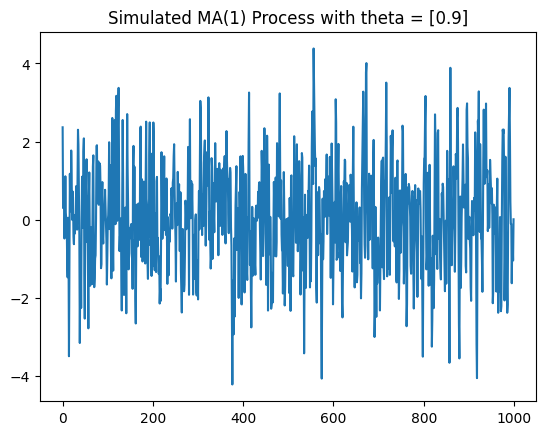

In [3]:
theta_ma_1 = [0.9]

y_t_ma_1 = simulate_ma_process(mean=0, variance=1, q=1, n=1000, thetas=theta_ma_1)

plt.plot(y_t_ma_1)
plt.title(f"Simulated MA(1) Process with theta = {theta_ma_1}")
plt.show();


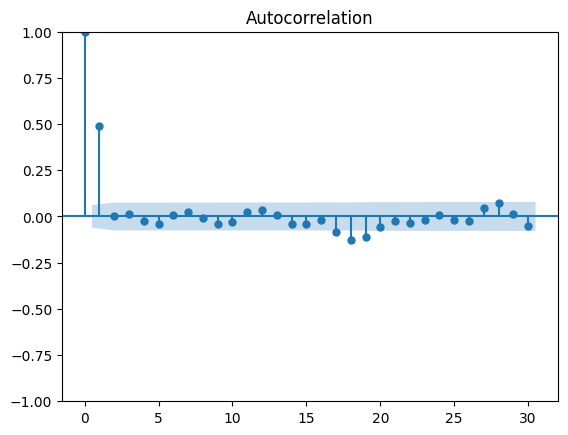

In [4]:
plot_acf(x=y_t_ma_1);


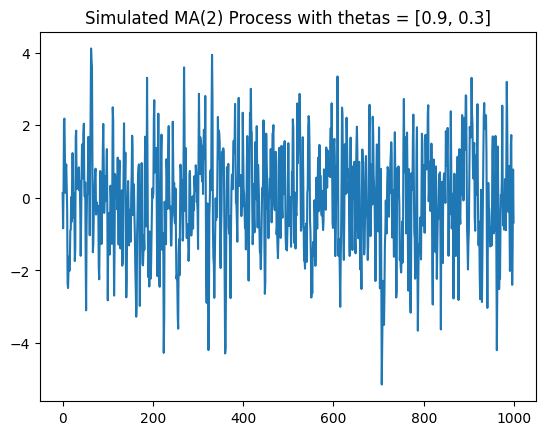

In [5]:
thetas_ma_2 = [0.9, 0.3]

y_t_ma_2 = simulate_ma_process(mean=0, variance=1, q=2, n=1000, thetas=thetas_ma_2)

plt.plot(y_t_ma_2)
plt.title(f"Simulated MA(2) Process with thetas = {thetas_ma_2}")
plt.show();


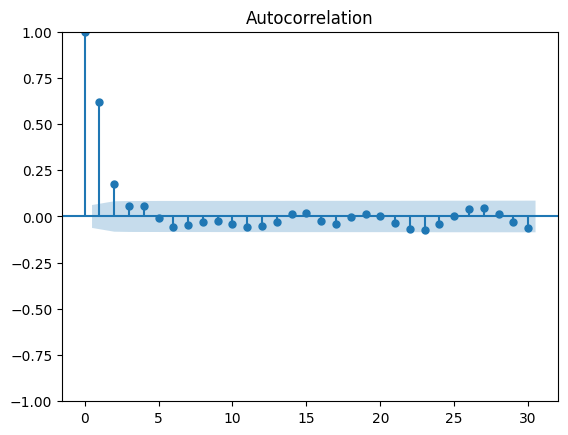

In [6]:
plot_acf(x=y_t_ma_2);


### MA(3) Process

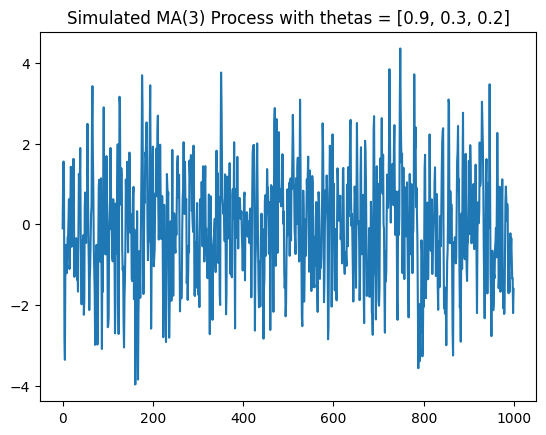

In [7]:
thetas_ma_3 = [0.9, 0.3, 0.2]

y_t_ma_3 = simulate_ma_process(mean=0, variance=1, q=3, n=1000, thetas=thetas_ma_3)

plt.plot(y_t_ma_3)
plt.title(f"Simulated MA(3) Process with thetas = {thetas_ma_3}")
plt.show();


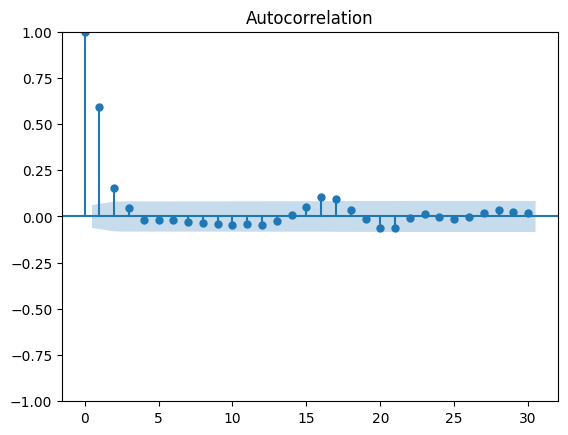

In [8]:
plot_acf(x=y_t_ma_3);
